# Fixed Points and Stability

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
%config InlineBackend.figure_format = "retina"

In [3]:
def euler(f, x0, steps=1000, dt=1e-4):
    xn = x0
    x_hist = np.zeros(steps)
    for s in range(steps):
        x_tilde = xn + f(xn) * dt
        x_next = xn + (f(xn) + f(x_tilde)) * dt / 2
        x_hist[s] = x_next
        xn = x_next
    
    return x_hist

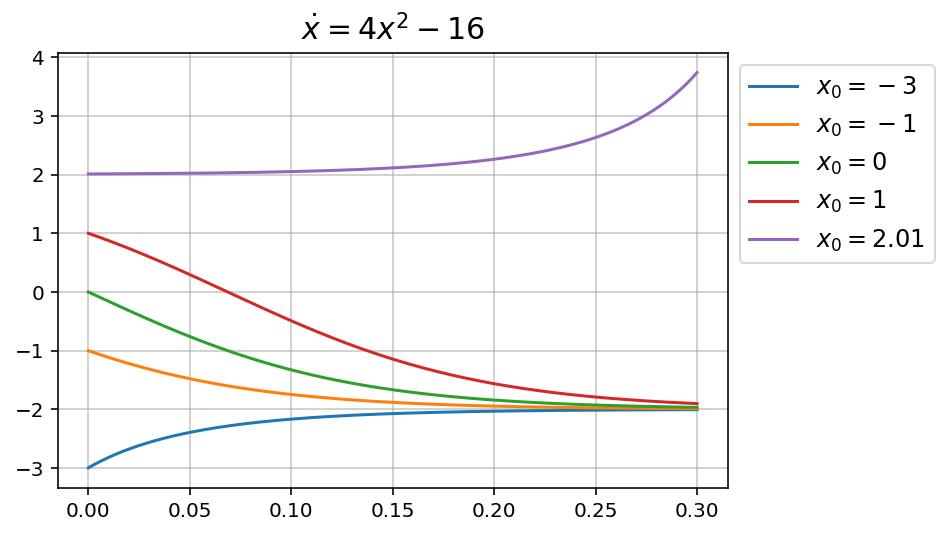

In [4]:
n_steps = 3000
dt = 0.0001


initial_points = [-3, -1, 0, 1, 2.01]
for x0 in initial_points:
    x = euler(lambda x: 4 * x ** 2 - 16, x0=x0, steps=n_steps, dt=dt)
    t = np.linspace(0, dt * n_steps, n_steps)
    plt.plot(t, x, label=rf"$x_0={x0}$")
plt.grid(alpha=0.7)
plt.legend(fontsize=12, bbox_to_anchor=(1, 1), loc="upper left")
plt.title(r"$\dot x = 4x^2 - 16$", fontsize=15);

Consider the following dynamical system 

$$
\dot x = x - x ^ 3
$$

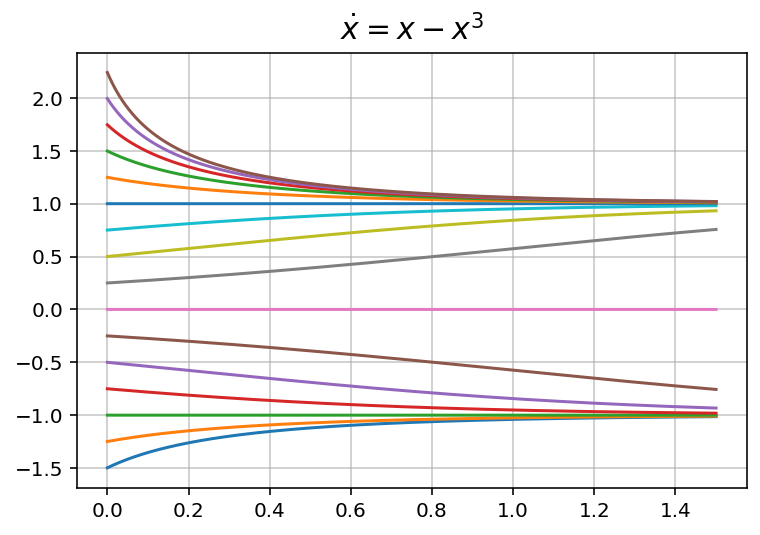

In [5]:
n_steps = 1500
dt = 0.001


initial_points = np.arange(-1.5, 2.5, 0.25)
for x0 in initial_points:
    x = euler(lambda x: x - x ** 3, x0=x0, steps=n_steps, dt=dt)
    t = np.linspace(0, dt * n_steps, n_steps)
    plt.plot(t, x, label=rf"$x_0={x0}$")
plt.grid(alpha=0.7)
plt.title(r"$\dot x = x - x ^ 3$", fontsize=15);

Consider the following dynamical system 

$$
\dot x = 1 + \frac{1}{2}\cos(x)
$$

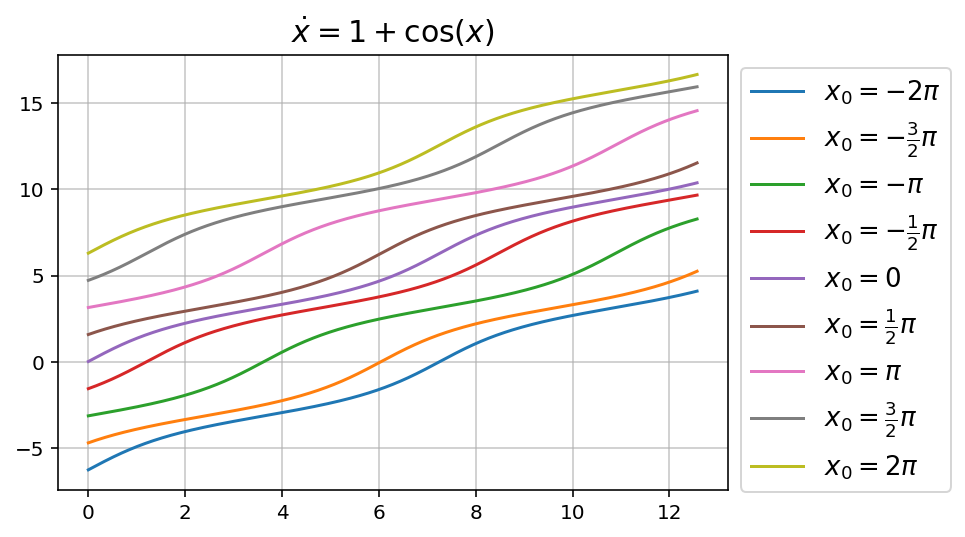

In [6]:
labels = [r"$-2\pi$", r"$-\frac{3}{2}\pi$", r"$-\pi$", r"$-\frac{1}{2}\pi$", r"0"]
labels = labels + [lab.replace("-", "") for lab in labels[:-1][::-1]]

dt = 0.01
n_steps = np.round(2 * np.pi / dt * 2).astype(int)


initial_points = np.arange(-2 * np.pi, 2 * np.pi + np.pi / 2, np.pi / 2)
for x0, label in zip(initial_points, labels):
    x = euler(lambda x: 1 + np.cos(x) / 2, x0=x0, steps=n_steps, dt=dt)
    t = np.linspace(0, dt * n_steps, n_steps)
    plt.plot(t, x, label=rf"$x_0=${label}")
plt.grid(alpha=0.7)
plt.title(r"$\dot x = 1 + \cos(x)$", fontsize=15)
plt.legend(fontsize=13, bbox_to_anchor=(1,1))

In [7]:
1 - .5 ** 14

0.99993896484375

For the phase portrait shown in Figure 1, find an equation that is consistent with it.

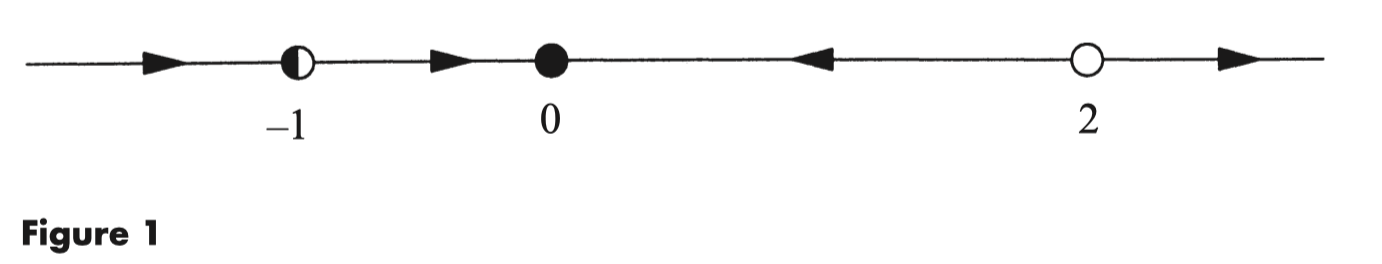

In [8]:
def categorize_fixed_point(left, right):
    if left == right == 1:
        return "left"
    elif left == right == -1:
        return "right"
    elif left == 1 and right == -1:
        return "full"
    else:
        return "none"

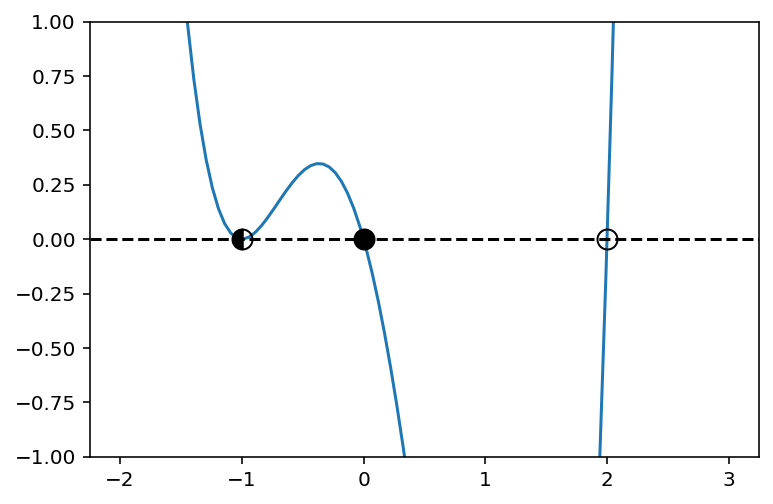

In [9]:
x = np.linspace(-2, 3, 100)
def xdot(x): return (x + 1) ** 2 * x * (x - 2)
plt.plot(x, xdot(x))
fixed_points = [-1, 0, 2]
epsilon = 1e-2
for point in fixed_points:
    sign_right = np.sign(xdot(point + epsilon))
    sign_left = np.sign(xdot(point - epsilon))
    fillstyle = categorize_fixed_point(sign_left, sign_right)
    plt.plot(point, 0, c="black", marker="o", fillstyle=fillstyle, markersize=10)
plt.axhline(y=0, c="black", linestyle="--")
plt.ylim(-1, 1);

## Exercise 2.2.9

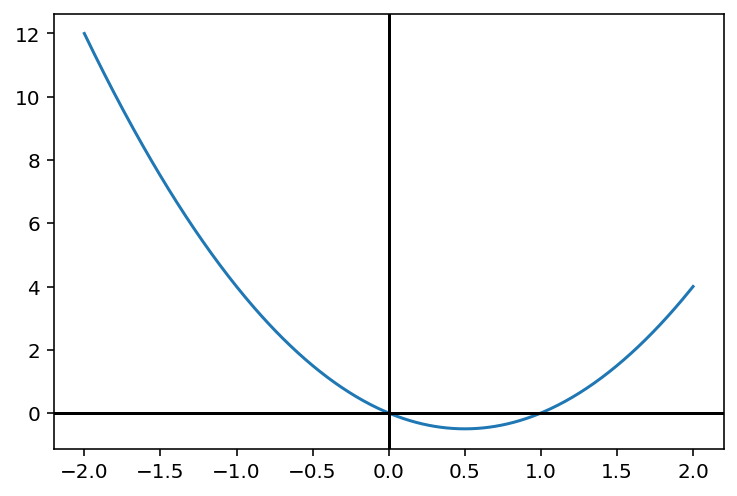

In [161]:
q, r = -1/4, -1/2
def f(x): return   2 * x * (x - 1)
xrange = np.linspace(-2, 2, 500)

plt.plot(xrange, f(xrange))
plt.axhline(y=0, c="black")
plt.axvline(x=0, c="black");

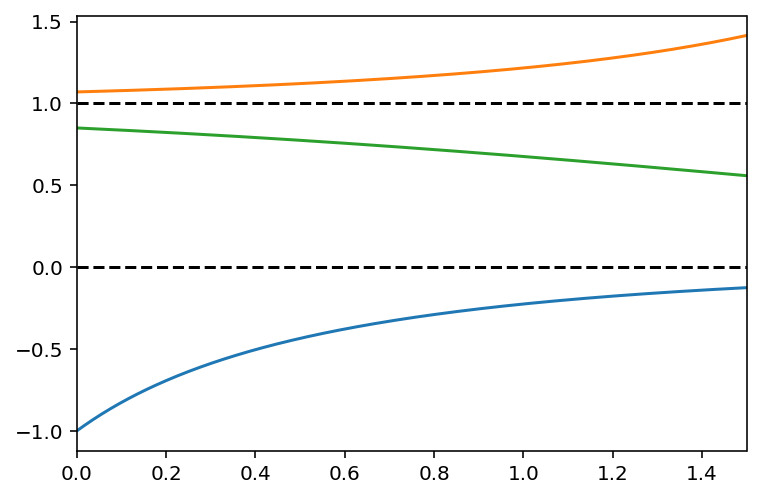

In [174]:
def f(x,t): return 1 * x * (x - 1)

t = np.linspace(0, 1.5, 300)

I = odeint(f, [-1, 1.07, 0.85], t)

plt.plot(t, I)
plt.axhline(y=0, c="black", linestyle="--")
plt.axhline(y=1, c="black", linestyle="--")
plt.xlim(0, 1.5);